Universidad del Valle de Guatemala <br/>
Modelacion y Simulacion <br/>
Docente: Samuel Chavez <br/>
Semestre 2, 2020 <br/>

Dieter Esteban de Wit Torres 15146 <br/>
&nbsp;
&nbsp;

# Mini	proyecto 3
&nbsp;

In [1]:
# --- Import required libraries ---
import random
import math

In [2]:
# --- Important Definitions ---
def exponential_service(lamda):
    return -float((1/lamda)*math.log(random.random()))

def event_time_persistence(s, lamda):
    return s-(1/lamda)*math.log(random.random())

In [19]:
# --- Gorila MegaComputing Simulation ---
def GorillaMegaComputing(arg):
    rate = 40
    closing_time = 3600
    request_times = []
    requests = 0
    exits = 0
    request_time = 0
    exit_time = 0
    processes = 0                  
    processing_time = 0
    inf = float('inf')
    
    while True:
        if(request_time <= exit_time and request_time <= closing_time):
            time = request_time
            requests = requests + 1
            processes = processes + 1
            request_time = event_time_persistence(time, rate)
            if processes == 1:
                Y = exponential_service(rate)
                exit_time = time + Y
            request_times.append(time)
        elif(exit_time < request_time and exit_time <= closing_time):
            time = exit_time
            processes = processes - 1
            exits = exits + 1
            if processes == 0:
                exit_time = inf
            else:
                Y = exponential_service(rate)
                exit_time = time + Y
                time = exit_time
        elif(min(request_time, exit_time) > closing_time and processes > 0):
            time = exit_time
            processes = processes - 1
            exits = exits + 1
            if processes > 0:
                Y = exponential_service(rate)
                exit_time = time + Y
                time = exit_time
        elif(min(request_time, exit_time) > closing_time and processes==0):
            processing_time = max(time - closing_time, 0)
            break
            
    free_time = exit_time - request_time
    total_time = 0
    for req_time in range(len(request_times)):
        remaining_time = request_times[req_time]
        total_time = total_time + remaining_time
        
    queue_time = total_time/len(request_times)
    
    if arg == 'requests':
        return requests

    print ("|-------------------Gorilla Megacomputing--------------------|")
    print ("El tiempo que estuvo ocupado Gorilla MegaComputing: ", exit_time)
    print ("El tiempo que estuvo desocupado Gorilla MegaComputing : ", free_time)
    print ("El tiempo estuvieron las solicitudes en cola", queue_time)

## Ejercicio	único – Servidores:

Es	usted	el/la	encargad@	de	definir	la	arquitectura	a	usar	en	el	lanzamiento	de	su	próxima	aplicación	Web:	C3 (Sistema	de	Contabilidad	del	Conde	Contador). La	junta	directiva	le	ha	solicitado	que	encuentre	el	mejor	servicio	de	hosting	para	el	proyecto.	Después	de	una	investigación	gigante,	usted	concluye	que	las	mejores	opciones	se	reducen	a	las	siguientes	dos:

### Proveedor	1	– Gorilla	Megacomputing:
    Tienen una infraestructura de servidor único, con mucha potencia de procesamiento. Ellos se enorgullecen al indicar que su servidor Enterprise puede atender hasta 100 solicitudes por segundo.

### Proveedor	2	– Ants	smart	computing:
    Tienen una infraestructura de múltiples servidores (en nube). Cada servidor es medianamente potente, y en su promoción indican que uno paga únicamente la cantidad de servidores que su aplicación requiera. Luego de su análisis de esta oferta, usted infiere que cada servidor tiene a lo sumo una décima parte de la potencia del servidor promocionado por Gorilla Megacomputing.

Las	pruebas	de	estrés	iniciales,	y	las	proyecciones	calculadas	para	los	primeros	2	años	luego	del	lanzamiento,	indican	que	su	aplicación	jamás	excederá	los	2400	solicitudes	por	minuto.	Una	auditoría	y	análisis	de	benchmark a	sistemas	similares	al	suyo,	indican	que	las	solicitudes	deberían	llegar como	un	proceso	de	Poisson,	y	que	el	tiempo	de	servicio	de	cada	solicitud	(sin	importar	la	arquitectura	de	servidor	usada)	es	modelado	adecuadamente	por	una	variable	aleatoria	exponencial.

Mañana	tiene	que	presentar	su	decisión	final	a	la	junta	directiva	del	proyecto.		Como	no	tiene	tiempo	para	hacer una	investigación	a	detalle	con	los	clientes	de	cada	proveedor,	decide	creer	en	su	promoción	y	hacer	una	simulación	para	concluir	cuál	será	la	mejor	opción.

### Task 1: 

Modele,	simule	y	analice el	comportamiento	de	ambos	sistemas	durante	una	hora	de	ejecución	de	C3,	y	para	cada	sistema	responda:

- ¿Cuántas	solicitudes atendió	cada	servidor?

In [28]:
print ("> Gorilla MegaComputing atendio", GorillaMegaComputing('requests'), "solicitudes.")
print ("> Gorilla MegaComputing atendio", GorillaMegaComputing('requests'), "solicitudes.")

> Gorilla MegaComputing atendio 144005 solicitudes.


### Task 2: 

Determine	experimentalmente	**p1**,	**p2**,	**p3** que	hacen	su	dibujo	más	denso.

- La probabilidad individual para **p1**, **p2** y **p3** que genera el dibujo mas denso es de 0.333 para cada una de ellas, sin embargo no se represento en el codigo debido a que como la probabilidad es la misma para las 3 individuales no existe cambio si se multiplica el estado deterministico or un factor unitario. 

## Ejercicio	2 - El helecho de Barnsley:

En	general	los	juegos	del	caos	pueden definirse	como	un	Framework (F,	X,	n),	donde	**F** es	un	conjunto	de **k** funciones	determinísticas,	y	**X**	es	una	variable	aleatoria	discreta	con	distribución	probabilística:	**P**	=	{pi	|	P(X	=	i)	=	pi},	y	**n** es	la	cantidad	de	puntos	a	dibujar.	Noten	que	|P|	=	k.

Para	este	fractal	en	específico,	considere:

```
F =
f1(x, y) -> (x*0.85 + y*0.04 + 0.0, x*-0.04 + y*0.85 + 1.6)
f2(x, y) -> (-0.15*x + 0.28*y + 0.0, x*0.26 + y*0.24 + 0.44)
f3(x, y) -> (x*0.2 + y*-0.26 + 0.0, x*0.23 + y*0.22 + 1.6)
f4(x, y) -> (x*0.0 + y*0.0, x*0.0 + y*0.16)
```

**P**	= {0.85,	0.07,	0.07,	0.01}

**n**	=	10000

### Task 1: 

Cree	un	programa	que	corra	el	anterior	juego	de	caos	y		muestre	el	dibujo	resultante.

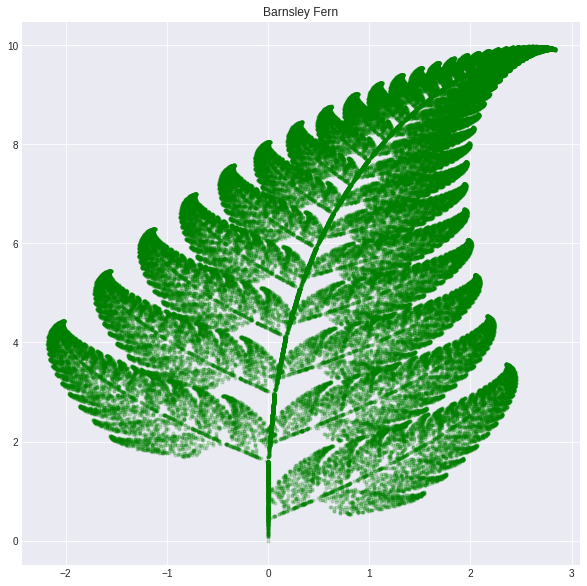

In [109]:
def apply_state(states, probability):
    steps = []
    for state, individual_probability in zip(states, probability):
         steps += [state] * int(individual_probability)
    return random.choice(steps)

def deterministic_state(x, y):
    return [(x*0.86 + y*0.04+ 0.0, x*-0.04 + y* 0.85 + 1.6), (-0.15*x + 0.28*y + 0.0, x*0.26+ y*0.24+ 0.44), (x*0.2 + y*-0.26 + 0.0, x*0.23 + y*0.22 + 1.6), (x*0.0 + y*0.0, x*0.0 + y*0.16)]

def Barnsley(probability, n):
    x = [0]
    y = [0]
    for i in range(n):
        points = probabilidad(deterministic_state(x[i-1], y[i-1]), probability)
        x.append(points[0])
        y.append(points[1]) 
    return x, y

Barnsley = Barnsley([0.85, 0.07, 0.07, 0.01], 100000)
plt.figure(figsize=(10,10))
plt.title("Barnsley Fern")
plt.plot(Barnsley[0], Barnsley[1], "g.", alpha=0.2)
plt.show()

## Ejercicio	3	– Análisis	de	pseudorandoms:

Considere	las	siguientes	dos	funciones	generadoras	de	pseudorandoms:

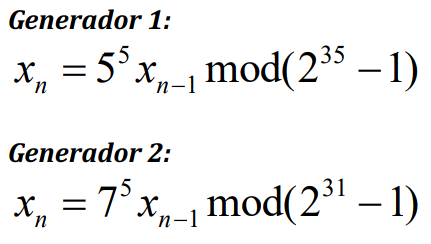

Y	considere	al	generador	de	números	aleatorios	uniformes	en	(0,	1)	default	de	su	lenguaje	de programación	de	elección,	como	un	tercer	generador	de	números	aleatorios:

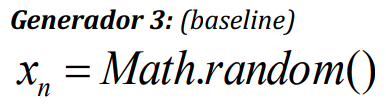

### Task 1: 

Construya	un	programa	que	compare	estos	tres	generadores	a	través	de	un	histograma de	asteriscos	(de	0	a	1	con	saltos	de	0.1).	Use	tres	comparaciones,	para	100,	5000	y	100000	repeticiones.

In [295]:
def get_pseudorandoms(generator, n):
    if generator == 1:
        pseudorandoms = generator_one(n)
        histogram(pseudorandoms, n//100)
    elif generator == 2:
        pseudorandoms = generator_two(n)
        histogram(pseudorandoms, n//100)
    elif generator == 3:
        pseudorandoms = baseline_generator(n)
        histogram(pseudorandoms, n//100)

def histogram(pseudorandoms, reduce_factor):
    count0, count1, count2, count3, count4, count5, count6, count7, count8, count9 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    for i in range(len(pseudorandoms)):
        if pseudorandoms[i] <= 0.1:
            count0 += 1
        elif 0.1 < pseudorandoms[i] <= 0.2:
            count1 += 1
        elif 0.2 < pseudorandoms[i] <= 0.3:
            count2 += 1
        elif 0.3 < pseudorandoms[i] <= 0.4:
            count3 += 1
        elif 0.4 < pseudorandoms[i] <= 0.5:
            count4 += 1
        elif 0.5 < pseudorandoms[i] <= 0.6:
            count5 += 1
        elif 0.6 < pseudorandoms[i] <= 0.7:
            count6 += 1
        elif 0.7 < pseudorandoms[i] <= 0.8:
            count7 += 1
        elif 0.8 < pseudorandoms[i] <= 0.9:
            count8 += 1
        elif 0.9 < pseudorandoms[i] <= 1:
            count9 += 1
        
    print('0.0-0.1:  ' + get_asterisks(count0//reduce_factor) + '  ({}, {}%)'.format(count0, round((count0*100)/len(pseudorandoms), 2)))
    print('0.1-0.2:  ' + get_asterisks(count1//reduce_factor) + '  ({}, {}%)'.format(count1, round((count1*100)/len(pseudorandoms), 2)))
    print('0.2-0.3:  ' + get_asterisks(count2//reduce_factor) + '  ({}, {}%)'.format(count2, round((count2*100)/len(pseudorandoms), 2)))
    print('0.3-0.4:  ' + get_asterisks(count3//reduce_factor) + '  ({}, {}%)'.format(count3, round((count3*100)/len(pseudorandoms), 2)))
    print('0.4-0.5:  ' + get_asterisks(count4//reduce_factor) + '  ({}, {}%)'.format(count4, round((count4*100)/len(pseudorandoms), 2)))
    print('0.5-0.6:  ' + get_asterisks(count5//reduce_factor) + '  ({}, {}%)'.format(count5, round((count5*100)/len(pseudorandoms), 2)))
    print('0.6-0.7:  ' + get_asterisks(count6//reduce_factor) + '  ({}, {}%)'.format(count6, round((count6*100)/len(pseudorandoms), 2)))
    print('0.7-0.8:  ' + get_asterisks(count7//reduce_factor) + '  ({}, {}%)'.format(count7, round((count7*100)/len(pseudorandoms), 2)))
    print('0.8-0.9:  ' + get_asterisks(count8//reduce_factor) + '  ({}, {}%)'.format(count8, round((count8*100)/len(pseudorandoms), 2)))
    print('0.9-1.0:  ' + get_asterisks(count9//reduce_factor) + '  ({}, {}%)'.format(count9, round((count9*100)/len(pseudorandoms), 2)))

def get_asterisks(counts):
    histogram_line = ''
    for i in range(counts):
        histogram_line += '* '
    return histogram_line

def generator_one(n):
    previous_X, pseudorandoms = 1, []
    for i in range(1, n):
        X = ((5**5)*previous_X)%(2**35-1)
        previous_X = X
        pseudorandoms.append(X)
    max_pseudorandom = max(pseudorandoms)
    return [i/max_pseudorandom for i in pseudorandoms]

def generator_two(n):
    previous_X, pseudorandoms = 1, []
    for i in range(1, n):
        X = ((7**5)*previous_X)%(2**31-1)
        previous_X = X
        pseudorandoms.append(X)
    max_pseudorandom = max(pseudorandoms)
    return [i/max_pseudorandom for i in pseudorandoms]

def baseline_generator(n):
    pseudorandoms = []
    for i in range(1, n):
        X = random.random()   
        pseudorandoms.append(X)
    return pseudorandoms

#### Generator 1:

In [296]:
#100 iterations:

get_pseudorandoms(1, 100)

0.0-0.1:  * * * * * * * *   (8, 8.08%)
0.1-0.2:  * * * * * * * * *   (9, 9.09%)
0.2-0.3:  * * * * * * * * * *   (10, 10.1%)
0.3-0.4:  * * * * * * * * * * *   (11, 11.11%)
0.4-0.5:  * * * * * * * * * * *   (11, 11.11%)
0.5-0.6:  * * * * * * *   (7, 7.07%)
0.6-0.7:  * * * * * *   (6, 6.06%)
0.7-0.8:  * * * * * * * * * * *   (11, 11.11%)
0.8-0.9:  * * * * * * * * * *   (10, 10.1%)
0.9-1.0:  * * * * * * * * * * * * * * * *   (16, 16.16%)


In [297]:
#5000 iterations:

get_pseudorandoms(1, 5000)

0.0-0.1:  * * * * * * * * * *   (509, 10.18%)
0.1-0.2:  * * * * * * * * * *   (507, 10.14%)
0.2-0.3:  * * * * * * * * *   (474, 9.48%)
0.3-0.4:  * * * * * * * * *   (467, 9.34%)
0.4-0.5:  * * * * * * * * * *   (505, 10.1%)
0.5-0.6:  * * * * * * * * * *   (512, 10.24%)
0.6-0.7:  * * * * * * * * *   (496, 9.92%)
0.7-0.8:  * * * * * * * * *   (491, 9.82%)
0.8-0.9:  * * * * * * * * * *   (520, 10.4%)
0.9-1.0:  * * * * * * * * * *   (518, 10.36%)


In [298]:
#100000 iterations:

get_pseudorandoms(1, 100000)

0.0-0.1:  * * * * * * * * *   (9862, 9.86%)
0.1-0.2:  * * * * * * * * * *   (10048, 10.05%)
0.2-0.3:  * * * * * * * * *   (9600, 9.6%)
0.3-0.4:  * * * * * * * * *   (9783, 9.78%)
0.4-0.5:  * * * * * * * * * *   (10293, 10.29%)
0.5-0.6:  * * * * * * * * * *   (10124, 10.12%)
0.6-0.7:  * * * * * * * * * *   (10100, 10.1%)
0.7-0.8:  * * * * * * * * *   (9809, 9.81%)
0.8-0.9:  * * * * * * * * * *   (10267, 10.27%)
0.9-1.0:  * * * * * * * * * *   (10113, 10.11%)


#### Generator 2:

In [299]:
#100 iterations:

get_pseudorandoms(2, 100)

0.0-0.1:  * * * * * * * * * * * * * *   (14, 14.14%)
0.1-0.2:  * * *   (3, 3.03%)
0.2-0.3:  * * * * * * * * * *   (10, 10.1%)
0.3-0.4:  * * * * * * * * *   (9, 9.09%)
0.4-0.5:  * * * * * * * * *   (9, 9.09%)
0.5-0.6:  * * * * * * * * * * *   (11, 11.11%)
0.6-0.7:  * * * * * * * * * *   (10, 10.1%)
0.7-0.8:  * * * * * * * * * * * *   (12, 12.12%)
0.8-0.9:  * * * * * * * * *   (9, 9.09%)
0.9-1.0:  * * * * * * * * * * * *   (12, 12.12%)


In [300]:
#5000 iterations:

get_pseudorandoms(2, 5000)

0.0-0.1:  * * * * * * * * *   (476, 9.52%)
0.1-0.2:  * * * * * * * * * *   (517, 10.34%)
0.2-0.3:  * * * * * * * * * *   (503, 10.06%)
0.3-0.4:  * * * * * * * * *   (482, 9.64%)
0.4-0.5:  * * * * * * * * * *   (525, 10.5%)
0.5-0.6:  * * * * * * * * * *   (534, 10.68%)
0.6-0.7:  * * * * * * * * *   (492, 9.84%)
0.7-0.8:  * * * * * * * * *   (481, 9.62%)
0.8-0.9:  * * * * * * * * *   (498, 9.96%)
0.9-1.0:  * * * * * * * * *   (491, 9.82%)


In [302]:
#100000 iterations:

get_pseudorandoms(2, 100000)

0.0-0.1:  * * * * * * * * * *   (10046, 10.05%)
0.1-0.2:  * * * * * * * * * *   (10016, 10.02%)
0.2-0.3:  * * * * * * * * *   (9863, 9.86%)
0.3-0.4:  * * * * * * * * *   (9878, 9.88%)
0.4-0.5:  * * * * * * * * * *   (10012, 10.01%)
0.5-0.6:  * * * * * * * * * *   (10285, 10.29%)
0.6-0.7:  * * * * * * * * *   (9931, 9.93%)
0.7-0.8:  * * * * * * * * *   (9955, 9.96%)
0.8-0.9:  * * * * * * * * * *   (10118, 10.12%)
0.9-1.0:  * * * * * * * * *   (9895, 9.9%)


#### Generator 3: (baseline)

In [303]:
#100 iterations:

get_pseudorandoms(3, 100)

0.0-0.1:  * * * * * * * * * * * * *   (13, 13.13%)
0.1-0.2:  * * * *   (4, 4.04%)
0.2-0.3:  * * * * * * * * * * * * *   (13, 13.13%)
0.3-0.4:  * * * * * *   (6, 6.06%)
0.4-0.5:  * * * * * * * * * *   (10, 10.1%)
0.5-0.6:  * * * * * * * * * *   (10, 10.1%)
0.6-0.7:  * * * * * * *   (7, 7.07%)
0.7-0.8:  * * * * * * * * * *   (10, 10.1%)
0.8-0.9:  * * * * * * * * * * * * * *   (14, 14.14%)
0.9-1.0:  * * * * * * * * * * * *   (12, 12.12%)


In [304]:
#5000 iterations:

get_pseudorandoms(3, 5000)

0.0-0.1:  * * * * * * * * * *   (538, 10.76%)
0.1-0.2:  * * * * * * * * *   (485, 9.7%)
0.2-0.3:  * * * * * * * * *   (494, 9.88%)
0.3-0.4:  * * * * * * * * * *   (502, 10.04%)
0.4-0.5:  * * * * * * * * * *   (500, 10.0%)
0.5-0.6:  * * * * * * * * *   (480, 9.6%)
0.6-0.7:  * * * * * * * * * *   (518, 10.36%)
0.7-0.8:  * * * * * * * * *   (482, 9.64%)
0.8-0.9:  * * * * * * * * *   (498, 9.96%)
0.9-1.0:  * * * * * * * * * *   (502, 10.04%)


In [305]:
#100000 iterations:

get_pseudorandoms(3, 100000)

0.0-0.1:  * * * * * * * * *   (9967, 9.97%)
0.1-0.2:  * * * * * * * * * *   (10185, 10.19%)
0.2-0.3:  * * * * * * * * *   (9912, 9.91%)
0.3-0.4:  * * * * * * * * * *   (10010, 10.01%)
0.4-0.5:  * * * * * * * * *   (9912, 9.91%)
0.5-0.6:  * * * * * * * * * *   (10141, 10.14%)
0.6-0.7:  * * * * * * * * *   (9988, 9.99%)
0.7-0.8:  * * * * * * * * *   (9994, 9.99%)
0.8-0.9:  * * * * * * * * *   (9799, 9.8%)
0.9-1.0:  * * * * * * * * * *   (10091, 10.09%)


### Task 2: 

¿Qué	generador	le	parece	mejor?	(considere	solamente	Generador	1	y	Generador	2)	

A mi criterio, el generador 2 es mejor por 2 razones. 
1. La primera, por una menor cantidad de iteraciones (5000) la serie empieza a tomar una forma bastante mejor distribuida que el generador 1.
2. La segunda, a mayor cantidad de iteraciones (100000) la distribucion es muy similar a la distribucion de la funcion random de python.

## Ejercicio	4	– integral unidimensional:

Considere	la	siguiente	integral:

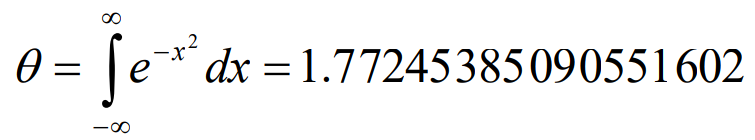

### Task 1:

Transforme	la	integral	a	una	con	límites	de	0	a	1,	muestre	su	procedimiento.

In [320]:
def g(y):
    return 2*((math.exp((-1)*((1/y)-1)**2))/(y**2))

### Task 2:

Aproxime	la	integral	usando	el	método	de	Montecarlo,	haciendo	100, 10000 y 1000000 iteraciones.

In [341]:
def MonteCarlo(F, n):
    differential = 0
    for i in range(n):
        decision = np.random.uniform(0, 1)+1
        differential += differential+F(np.random.random() + 1) 
        differential = differential/n
    return  differential + decision

print("MonteCarlo:")
print("100 iterations: " + str(MonteCarlo(g, 100)))       
print("10,000 iterations: " + str(MonteCarlo(g, 10000)))    
print("1,000,000 iterations: " + str(MonteCarlo(g, 1000000))) 

MonteCarlo:
100 iterations: 1.5924389343716212
10,000 iterations: 1.8187362111719967
1,000,000 iterations: 1.8354090880030212


## Ejercicio	5	– integral	bidimensional:

Considere	la	siguiente	integral:

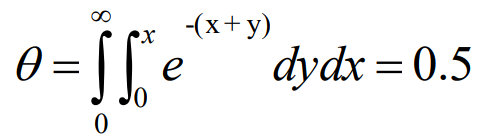

### Task 1:

Transforme	la	integral	a	una	con	límites	de	0	a	1,	muestre	su	procedimiento.

In [352]:
def g(x): return ((-1*math.exp((-2)*((1/x)-1)))+(math.exp((-1)*((1/x)-1))))/(x**2)

### Task 2:

Aproxime	la	integral	usando	el	método	de	Montecarlo,	haciendo	100, 10000 y 1000000 iteraciones.

In [351]:
def MonteCarlo(F, n):
    differential = 0
    for i in range(n):
        decision = np.random.uniform(0, 1) 
        decision1 = np.random.random()+1
        differential += differential+F(decision1) 
        differential = differential/n
    return  differential + decision

print("MonteCarlo:")
print("100 iterations: " + str(MonteCarlo(g, 100)))       
print("10,000 iterations: " + str(MonteCarlo(g, 10000)))    
print("1,000,000 iterations: " + str(MonteCarlo(g, 1000000))) 

MonteCarlo:
100 iterations: 0.5801187583375093
10,000 iterations: 0.3888949558775219
1,000,000 iterations: 0.5097307045213375
